In [1]:
import pandas as pd
import numpy as np
import csv as csv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv', header=0)  
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.values

array([[1L, 0L, 3L, ..., 7.25, nan, 'S'],
       [2L, 1L, 1L, ..., 71.2833, 'C85', 'C'],
       [3L, 1L, 3L, ..., 7.925, nan, 'S'],
       ..., 
       [889L, 0L, 3L, ..., 23.45, nan, 'S'],
       [890L, 1L, 1L, ..., 30.0, 'C148', 'C'],
       [891L, 0L, 3L, ..., 7.75, nan, 'Q']], dtype=object)

In [11]:
pd.get_dummies(train_df.Embarked,prefix='col1')

,col1_C,col1_Q,col1_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


Columns with null or Nan values
--------

In [10]:
print train_df.columns.values
for cl in train_df.columns.values:
    print cl,train_df[cl].isnull().sum()


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'C' 'Q' 'S']
PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2
C 0
Q 0
S 0


In [11]:
train_df['Gender'] = train_df.Sex.map( {'female': 0, 'male': 1} ).astype(int)

In [12]:
mean = train_df['Age'].dropna().mean()
print mean



29.6991176471


In [13]:
train_df.loc[ (train_df.Age.isnull()), 'Age'] = math.floor(mean)

In [14]:
print train_df['Age'].isnull().sum()

0


In [15]:
modeEmbarked = train_df.Embarked.dropna().mode().values
modeEmbarked

array(['S'], dtype=object)

In [16]:
train_df.Embarked[ train_df.Embarked.isnull() ] = modeEmbarked

C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
print train_df.Embarked.isnull().sum()

0


In [18]:
np.unique(train_df['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [19]:
np.unique(train_df['Pclass'])

array([1, 2, 3], dtype=int64)

In [20]:
np.unique(train_df['SibSp'])

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [21]:
np.unique(train_df['Parch'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [46]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_df['Age'].values.reshape(-1,1))
X_train_minmax.reshape(1,1)
#train_df['Age'] = X_train_minmax
#train_df.head()

ValueError: can only specify one unknown dimension

In [43]:
ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
ports = [(b, a) for a, b in ports]
ports

[('C', 0), ('Q', 1), ('S', 2)]

In [68]:
ports = dict(ports)
ports

{'C': 0, 'Q': 1, 'S': 2}

In [69]:
train_df.Embarked = train_df.Embarked.map( lambda x: ports[x]).astype(int) 
train_df.Embarked.head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [70]:
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [98]:
def preProcessData(dataframe):
    dataframe['Gender'] = dataframe.Sex.map( {'female': 0, 'male': 1} ).astype(int)
    modeEmbarked = dataframe.Embarked.dropna().mode().values
    dataframe.loc[ (dataframe.Embarked.isnull()), 'Embarked']  = modeEmbarked
    ports = list(enumerate(np.unique(dataframe['Embarked'])))
    ports = [(b, a) for a, b in ports]
    ports = dict(ports)
    dataframe.Embarked = dataframe.Embarked.map( lambda x: ports[x]).astype(int) 
    mean = dataframe['Age'].dropna().mean()
    dataframe.loc[ (dataframe.Age.isnull()), 'Age'] = math.floor(mean)
    mean = dataframe['Fare'].dropna().mean()
    dataframe.loc[ (dataframe.Fare.isnull()), 'Fare'] = math.floor(mean)
    ids = dataframe['PassengerId'].values
    dataframe = dataframe.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 

    return dataframe,ids

In [99]:
train_df = pd.read_csv('train.csv', header=0)  
train_df,ids = preProcessData(train_df)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [100]:
test_df = pd.read_csv('test.csv', header=0)  
test_df,ids = preProcessData(test_df)
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,2,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,2,1
4,3,22.0,1,1,12.2875,2,0


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307,-0.167675,-0.543351
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500,0.162098,0.131900
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706,-0.023464,0.082949
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651,0.068230,-0.114631
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225,0.039798,-0.245489
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000,-0.224719,-0.182333
Embarked,-0.167675,0.162098,-0.023464,0.068230,0.039798,-0.224719,1.000000,0.108262
Gender,-0.543351,0.131900,0.082949,-0.114631,-0.245489,-0.182333,0.108262,1.000000


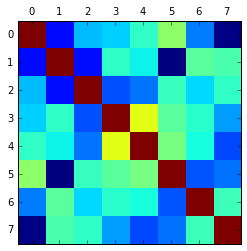

In [101]:
#np.corrcoef(train_df.values())
plt.matshow(train_df.corr())

train_df.corr()

In [102]:
print test_df.columns.values
for cl in test_df.columns.values:
    print cl,test_df[cl].isnull().sum()


['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Gender']
Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Embarked 0
Gender 0


In [107]:
from sklearn import linear_model

train_data = train_df.values
x_train, x_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], 
                            test_size = 0.2, random_state = 0) # Split training/test.
test_data = test_df.values

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_train, y_train )
y_true, y_pred = y_test, logreg.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

y_pred = logreg.predict(test_data).astype(int)
#print(classification_report(y_true, y_pred)) # Classification on each digit

In [109]:

predictions_file = open("LogisticRegression.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, y_pred))
predictions_file.close()